# Step 1: Preparations

In [1]:
import numpy as np  # Numeric Python library for linear algebra and calculations
import pandas as pd # Python library for data analysis and data frame (eg pd.read_csv)


# Visualization libraries
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Reading the "Movies Daily Update Dataset" dataset in the data
data = pd.read_csv("./Dataset/data.csv")

# Displaying the first 5 rows of the data frame
data.head()


,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,663712,Terrifier 2,Horror-Thriller,en,After being resurrected by a sinister entity A...,6912.168,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,5325078.0,138.0,Released,Who's Laughing Now?,7.281,290.0,Lauren LaVera-David Howard Thornton-Elliott Fu...,clown-halloween-resurrection-sequel-gore-slash...,/yw8NQyvbeNXoZO6v4SEXrgQ27Ll.jpg,/y5Z0WesTjvn59jP6yo459eUsbli.jpg,992016-882598-1026535-935999-800309-854513-102...
1,436270,Black Adam,Action-Fantasy-Science Fiction,en,Nearly 5000 years after he was bestowed with t...,4657.005,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,140000000.0,125.0,Released,The world needed a hero. It got Black Adam.,7.000,710.0,Dwayne Johnson-Aldis Hodge-Noah Centineo-Sarah...,lightning-anti hero-superhero-based on comic-d...,/3zXceNTtyj5FLjwQXuPvLYK5YYL.jpg,/bQXAqRx2Fgc46uCVWgoPz5L5Dtr.jpg,963954-616820-674324-575322-707103-663712-6427...
2,717728,Jeepers Creepers: Reborn,Horror-Thriller-Mystery,en,Forced to travel with her boyfriend to a horro...,2627.102,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,2892594.0,88.0,Released,Evil rides again.,5.786,395.0,Sydney Craven-Imran Adams-Jarreau Benjamin-Mat...,NaN,/aGBuiirBIQ7o64FmJxO53eYDuro.jpg,/tIX6j3NzadlwGcJ52nuWdmtOQkg.jpg,760161-338947-10065-723419-901385-934207-10066...
3,956101,The Eighth Clause,Thriller,la,Kat and Borja appear to be a perfect couple bu...,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,Released,NaN,4.600,10.0,Maite Perroni-Manuel Vega-Óscar Jaenada-Jessic...,NaN,/8tc8eMFAX2SDC1TRu987qFQy8Cl.jpg,/kLnqNE9Af5QHyvUxw8cDGhF1ilv.jpg,NaN
4,760161,Orphan: First Kill,Horror-Thriller,en,After escaping from an Estonian psychiatric fa...,2254.046,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,9572765.0,99.0,Released,There's always been something wrong with Esther.,6.820,1187.0,Isabelle Fuhrman-Julia Stiles-Rossif Sutherlan...,psychopath-family secrets-prequel-murder-imper...,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,10065-421285-15737-985939-718930-84773-790-760...


In [3]:
data.shape

(740100, 20)

This output shows that the dataset has 740100 rows and 20 columns.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740100 entries, 0 to 740099
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    740100 non-null  int64  
 1   title                 740096 non-null  object 
 2   genres                520834 non-null  object 
 3   original_language     740100 non-null  object 
 4   overview              619791 non-null  object 
 5   popularity            740100 non-null  float64
 6   production_companies  343410 non-null  object 
 7   release_date          684333 non-null  object 
 8   budget                740100 non-null  float64
 9   revenue               740100 non-null  float64
 10  runtime               702308 non-null  float64
 11  status                740100 non-null  object 
 12  tagline               109508 non-null  object 
 13  vote_average          740100 non-null  float64
 14  vote_count            740100 non-null  float64
 15  

The dataset consists of int, string and float data types. Some columns contain the value NaN, these columns need to be cleared.

In [5]:
data.isnull().sum()

id                           0
title                        4
genres                  219266
original_language            0
overview                120309
popularity                   0
production_companies    396690
release_date             55767
budget                       0
revenue                      0
runtime                  37792
status                       0
tagline                 630592
vote_average                 0
vote_count                   0
credits                 230296
keywords                526367
poster_path             196730
backdrop_path           515815
recommendations         699560
dtype: int64

# Step 2: Clean the Data

In [6]:
data.duplicated().sum()

147

There are 147 duplicate rows in the dataset, so these rows will be cleared.

In [7]:
data.drop_duplicates(inplace=True)

data.duplicated().sum()


0

- Duplicate lines have been deleted. To get rid of unnecessary data, movies with the same name should be looked at.

> **Warning**
> There may be movies with similar names. Therefore, it is necessary to look at whether the dates are the same.

In [8]:
# Checking movies with same title and same release date
data[['release_date', 'title']].duplicated().sum()


79970

In [9]:
data.drop_duplicates(subset=['release_date', 'title'], inplace=True)

data[['release_date', 'title']].duplicated().sum()

0

In [10]:
data.shape

(659983, 20)

(740100, 20) -> (659983, 20)

Not all columns are required for analysis. So some columns need to be discarded.

In [11]:
drop_columns = ['id', 'title', 'original_language', 'overview','status', 'tagline',
                'credits', 'keywords', 'poster_path', 'backdrop_path', 'recommendations']
data.drop(drop_columns, axis=1, inplace=True)
data.head()

,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count
0,Horror-Thriller,6912.168,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,5325078.0,138.0,7.281,290.0
1,Action-Fantasy-Science Fiction,4657.005,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,140000000.0,125.0,7.000,710.0
2,Horror-Thriller-Mystery,2627.102,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,2892594.0,88.0,5.786,395.0
3,Thriller,2259.303,SDB Films-El Hombre Orquesta,2022-04-29,0.0,0.0,0.0,4.600,10.0
4,Horror-Thriller,2254.046,Dark Castle Entertainment-Entertainment One-Ea...,2022-07-27,0.0,9572765.0,99.0,6.820,1187.0


In [12]:
data.isnull().sum()

genres                  204447
popularity                   0
production_companies    362044
release_date             52332
budget                       0
revenue                      0
runtime                  35231
vote_average                 0
vote_count                   0
dtype: int64

In [13]:
data.dropna(inplace=True)

data.isnull().sum().sum()

0

[Help-> pandas dropna() Usage & Examples][Link]

[Link]:https://sparkbyexamples.com/pandas/pandas-dropna-usage-examples/

In [14]:
data.describe()

,popularity,budget,revenue,runtime,vote_average,vote_count
count,264261.000000,2.642610e+05,2.642610e+05,264261.000000,264261.000000,264261.000000
mean,3.491486,9.788563e+05,2.557670e+06,66.211223,3.564045,69.577592
std,28.717591,8.692642e+06,3.221699e+07,57.509226,3.218150,606.005826
min,0.600000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.600000,0.000000e+00,0.000000e+00,16.000000,0.000000,0.000000
50%,0.960000,0.000000e+00,0.000000e+00,80.000000,4.600000,1.000000
75%,2.127000,0.000000e+00,0.000000e+00,96.000000,6.300000,7.000000
max,6912.168000,5.000000e+08,2.920357e+09,12480.000000,10.000000,32519.000000


In [15]:
specific_data = data.query('budget == 0 or revenue == 0 or runtime == 0').index
data.drop(specific_data, axis=0, inplace=True)

data.describe()

,popularity,budget,revenue,runtime,vote_average,vote_count
count,9217.000000,9.217000e+03,9.217000e+03,9217.000000,9217.000000,9217.000000
mean,27.100898,2.425671e+07,6.913410e+07,105.970923,6.241053,1482.822827
std,114.998909,3.789432e+07,1.571505e+08,28.903977,1.627677,2854.206178
min,0.600000,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000
25%,6.451000,2.100000e+06,2.000000e+06,93.000000,5.800000,66.000000
50%,12.462000,1.000000e+07,1.470000e+07,104.000000,6.432000,398.000000
75%,23.433000,3.000000e+07,6.371000e+07,120.000000,7.097000,1504.000000
max,6912.168000,5.000000e+08,2.920357e+09,480.000000,10.000000,32519.000000


[Help-> DataFrame.query][Link]

[Link]: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9217 entries, 0 to 740004
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                9217 non-null   object 
 1   popularity            9217 non-null   float64
 2   production_companies  9217 non-null   object 
 3   release_date          9217 non-null   object 
 4   budget                9217 non-null   float64
 5   revenue               9217 non-null   float64
 6   runtime               9217 non-null   float64
 7   vote_average          9217 non-null   float64
 8   vote_count            9217 non-null   float64
dtypes: float64(6), object(3)
memory usage: 720.1+ KB


In [17]:
data.to_csv('./Dataset/data_new_2.csv')
dnew = pd.read_csv('./Dataset/data_new_2.csv')


# Step 3: Analyze The Data

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

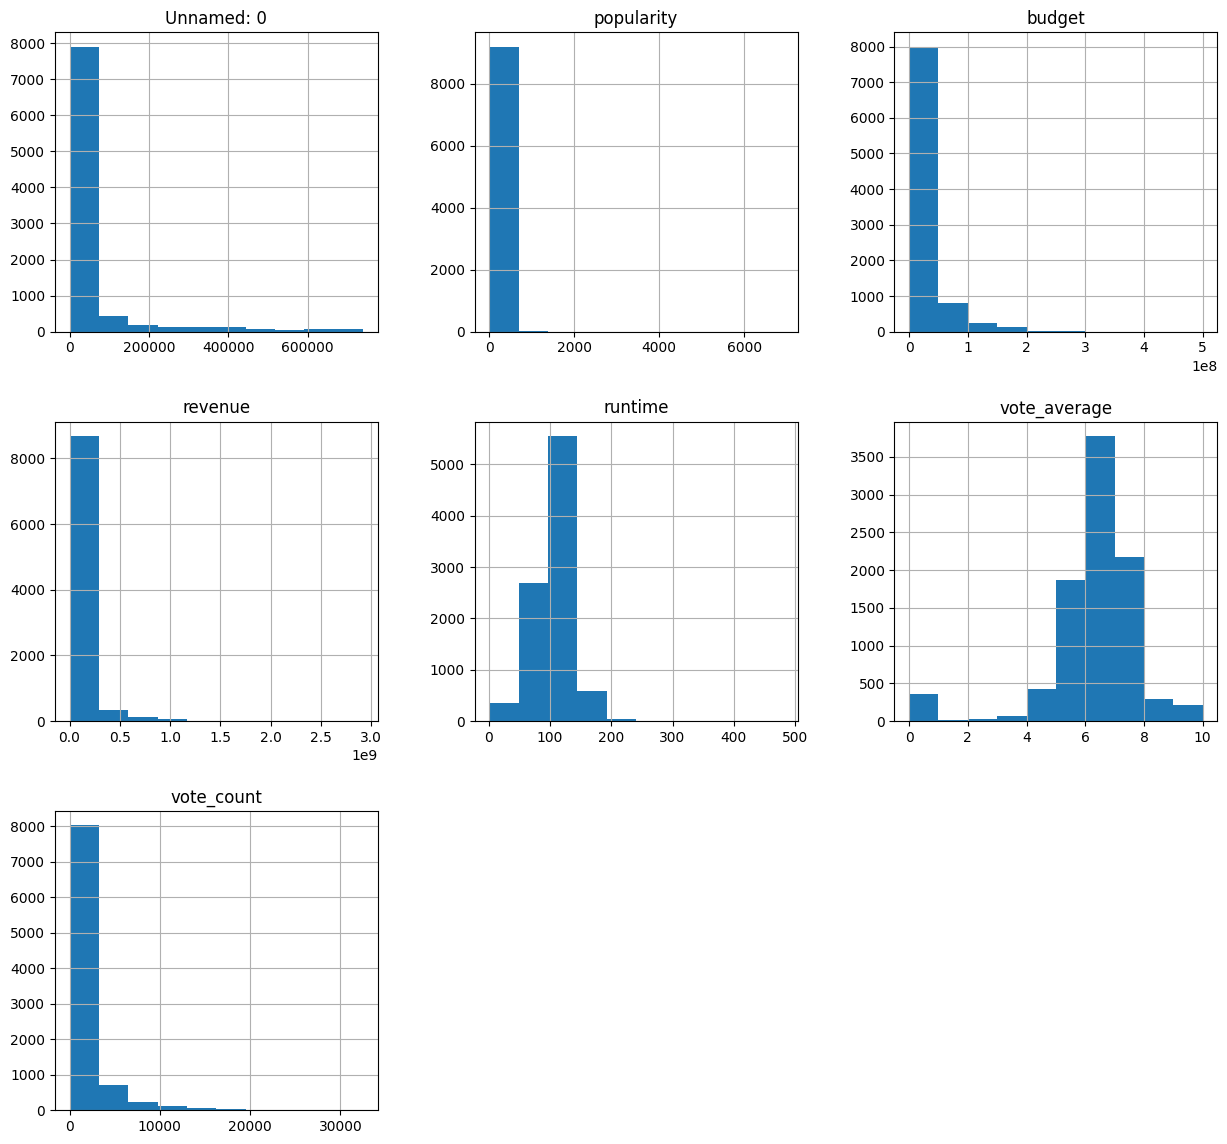

In [18]:
dnew.hist(figsize=(15,14))

<AxesSubplot:>

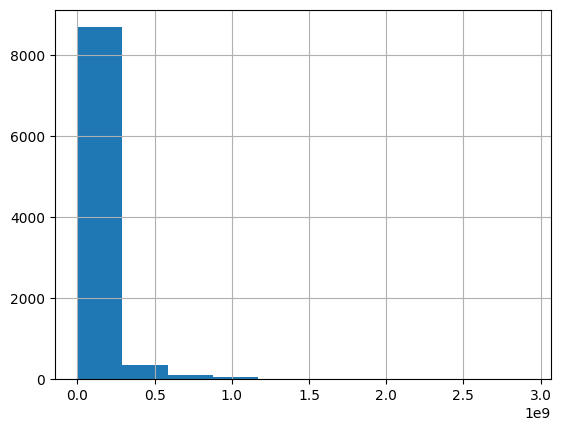

In [19]:
dnew.revenue.hist()


In [20]:
dnew['year'] = pd.DatetimeIndex(dnew['release_date']).year
dnew.head()


,Unnamed: 0,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,year
0,0,Horror-Thriller,6912.168,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,5325078.0,138.0,7.281,290.0,2022
1,1,Action-Fantasy-Science Fiction,4657.005,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,140000000.0,125.0,7.000,710.0,2022
2,2,Horror-Thriller-Mystery,2627.102,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,2892594.0,88.0,5.786,395.0,2022
3,7,Horror-Thriller,2166.823,Miramax-Universal Pictures-Blumhouse Productio...,2022-10-12,20000000.0,63000000.0,111.0,6.645,787.0,2022
4,10,Family-Animation-Fantasy-Music-Comedy-Adventure,2000.190,Walt Disney Pictures-Pixar,2017-10-27,175000000.0,800526015.0,105.0,8.227,16330.0,2017


In [21]:
bin_years = [1920, 1930, 1940, 1950, 1960,
             1970, 1980, 1990, 2000, 2010, 2020, 2022]
bin_decade = ['1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s',
              '1990s', '2000s', '2010s', '2020s']
dnew['decade'] = pd.cut(dnew['year'], bin_years, labels=bin_decade)
dnew.head()


,Unnamed: 0,genres,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,year,decade
0,0,Horror-Thriller,6912.168,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,2022-10-06,250000.0,5325078.0,138.0,7.281,290.0,2022,2020s
1,1,Action-Fantasy-Science Fiction,4657.005,New Line Cinema-Flynn Picture Company-Seven Bu...,2022-10-19,200000000.0,140000000.0,125.0,7.000,710.0,2022,2020s
2,2,Horror-Thriller-Mystery,2627.102,Screen Media Films-Black Hangar Studios-Orwo S...,2022-09-15,20000000.0,2892594.0,88.0,5.786,395.0,2022,2020s
3,7,Horror-Thriller,2166.823,Miramax-Universal Pictures-Blumhouse Productio...,2022-10-12,20000000.0,63000000.0,111.0,6.645,787.0,2022,2020s
4,10,Family-Animation-Fantasy-Music-Comedy-Adventure,2000.190,Walt Disney Pictures-Pixar,2017-10-27,175000000.0,800526015.0,105.0,8.227,16330.0,2017,2010s


### Change of Revenue by Years

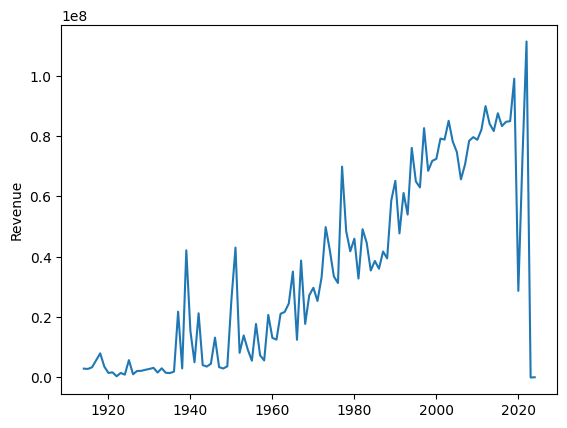

In [22]:
rev_line = dnew.groupby('year')['revenue'].mean()

plt.plot(rev_line)
plt.ylabel('Revenue')

plt.show()


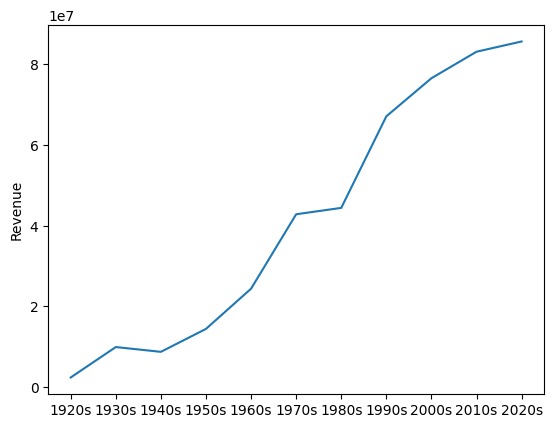

In [23]:
rev_line = dnew.groupby('decade')['revenue'].mean()

plt.plot(rev_line)
plt.ylabel('Revenue')

plt.show()


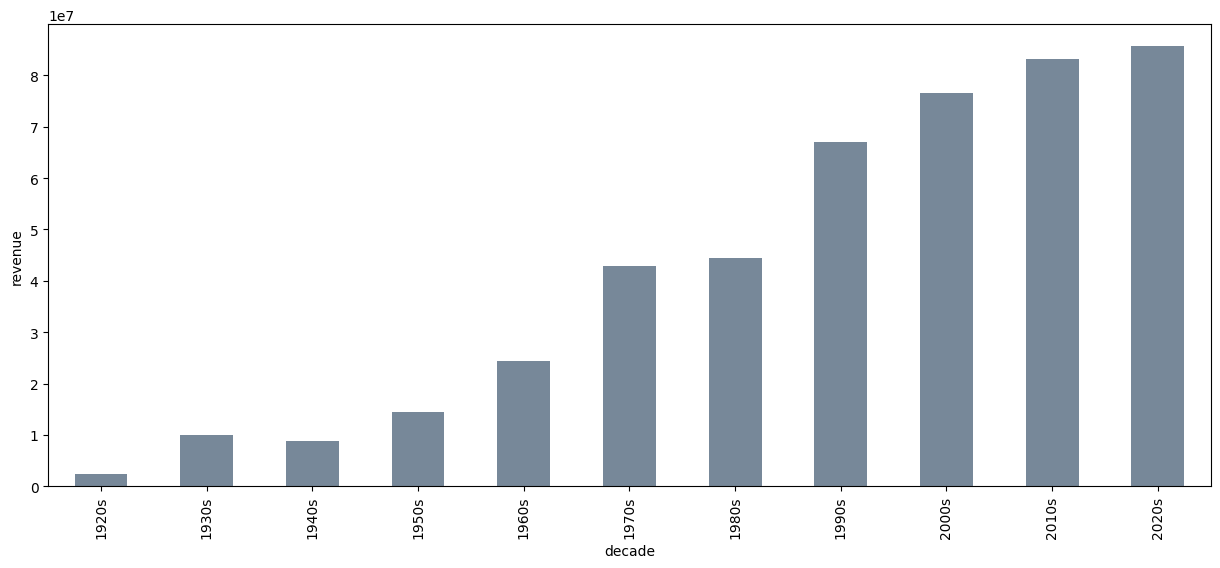

In [24]:
rev_bar = dnew.groupby('decade')['revenue'].mean()

rev_bar.plot(kind='bar', 
             ylabel='revenue', xlabel='decade', figsize=(15, 6), color='lightslategray')

plt.show()


## Finding Binary Correlation of Columns

In [25]:
# Looking at high revenue

rev_high= dnew[dnew.revenue > dnew.revenue.quantile(.75)]
rev_high.revenue.describe()


count    2.304000e+03
mean     2.359413e+08
std      2.468154e+08
min      6.376651e+07
25%      9.529010e+07
50%      1.503383e+08
75%      2.703526e+08
max      2.920357e+09
Name: revenue, dtype: float64

[Help->pandas.DataFrame.describe][Link]

[Link]: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

Correlation is a statistical measure that expresses the extent to which two variables are linearly related. So let's calculate their correlation.

### Revenue ve Vote_average

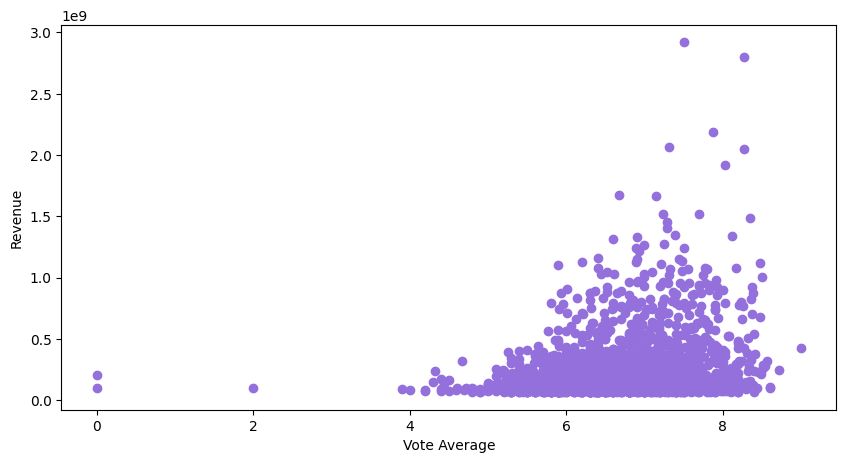

In [26]:
plt.figure(figsize=(10, 5))
plt.scatter(x=rev_high.vote_average, y=rev_high.revenue, c='mediumpurple')

plt.xlabel('Vote Average')
plt.ylabel('Revenue')

plt.show()


In [27]:
# 'revenue' ve 'vote_average' arasındaki korelasyonu hesaplamak
rev_high[['revenue', 'vote_average']].corr()


,revenue,vote_average
revenue,1.0000,0.2443
vote_average,0.2443,1.0000


This output shows that the correlation is 0.24.

### Revenue and Popularity

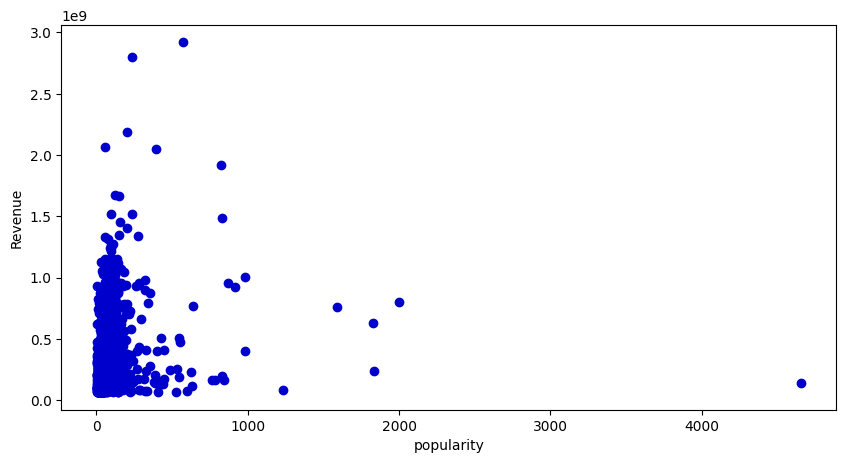

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(x=rev_high.popularity, y=rev_high.revenue, c='mediumblue')
plt.xlabel('popularity')
plt.ylabel('Revenue')

plt.show()

In [29]:
rev_high[['revenue', 'popularity']].corr()


,revenue,popularity
revenue,1.000000,0.230519
popularity,0.230519,1.000000


This output shows that the correlation is 0.23.

### Revenue and Budget

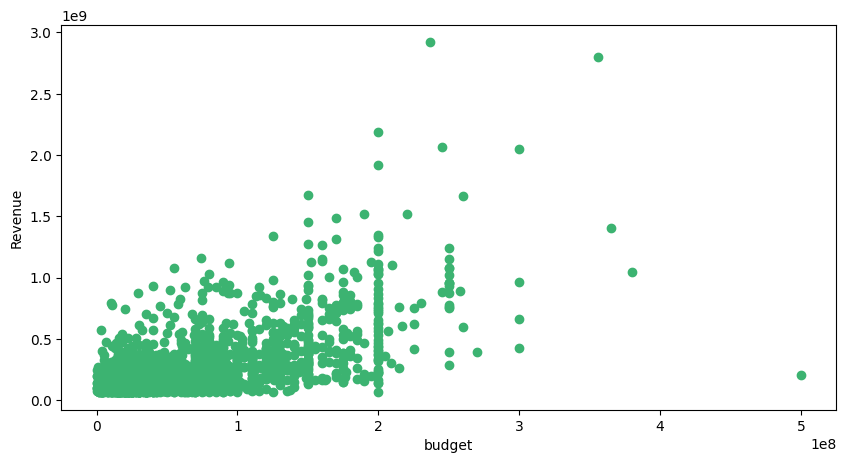

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(x=rev_high.budget, y=rev_high.revenue, c='mediumseagreen')
plt.xlabel('budget')
plt.ylabel('Revenue')

plt.show()

In [31]:
rev_high[['revenue', 'budget']].corr()


,revenue,budget
revenue,1.000000,0.637752
budget,0.637752,1.000000


This output shows that the correlation is 0.63

## Total Revenue

### Production Companies


In [32]:
dnew_production = dnew[['production_companies', 'revenue', 'popularity', 'decade']]
dnew_production.head()

,production_companies,revenue,popularity,decade
0,Bloody Disgusting-Dark Age Cinema-Fuzz on the ...,5325078.0,6912.168,2020s
1,New Line Cinema-Flynn Picture Company-Seven Bu...,140000000.0,4657.005,2020s
2,Screen Media Films-Black Hangar Studios-Orwo S...,2892594.0,2627.102,2020s
3,Miramax-Universal Pictures-Blumhouse Productio...,63000000.0,2166.823,2020s
4,Walt Disney Pictures-Pixar,800526015.0,2000.190,2010s


In [33]:
dnew_production= dnew_production.replace('Metro-Goldwyn-Mayer', 'MGM', regex=True)

[Help ->Pandas Replace substring in DataFrame][Link]

[Link]: https://sparkbyexamples.com/pandas/pandas-replace-substring-in-dataframe/

In [34]:
from itertools import chain

def chainer(s):
    return list(chain.from_iterable(s.str.split('-')))

row_new = dnew_production['production_companies'].str.split('-').map(len)

dnew_production = pd.DataFrame({
    'production_companies': chainer(dnew_production['production_companies']),
    'popularity': np.repeat(dnew_production['popularity'], row_new),
    'decade': np.repeat(dnew_production['decade'], row_new),
    'revenue': np.repeat(dnew_production['revenue'], row_new)})

dnew_production.head()


,production_companies,popularity,decade,revenue
0,Bloody Disgusting,6912.168,2020s,5325078.0
0,Dark Age Cinema,6912.168,2020s,5325078.0
0,Fuzz on the Lens Productions,6912.168,2020s,5325078.0
1,New Line Cinema,4657.005,2020s,140000000.0
1,Flynn Picture Company,4657.005,2020s,140000000.0


[Help-> Stackoverflow][Link]

[Link]: https://stackoverflow.com/questions/50731229/split-cell-into-multiple-rows-in-pandas-dataframe

<AxesSubplot:>

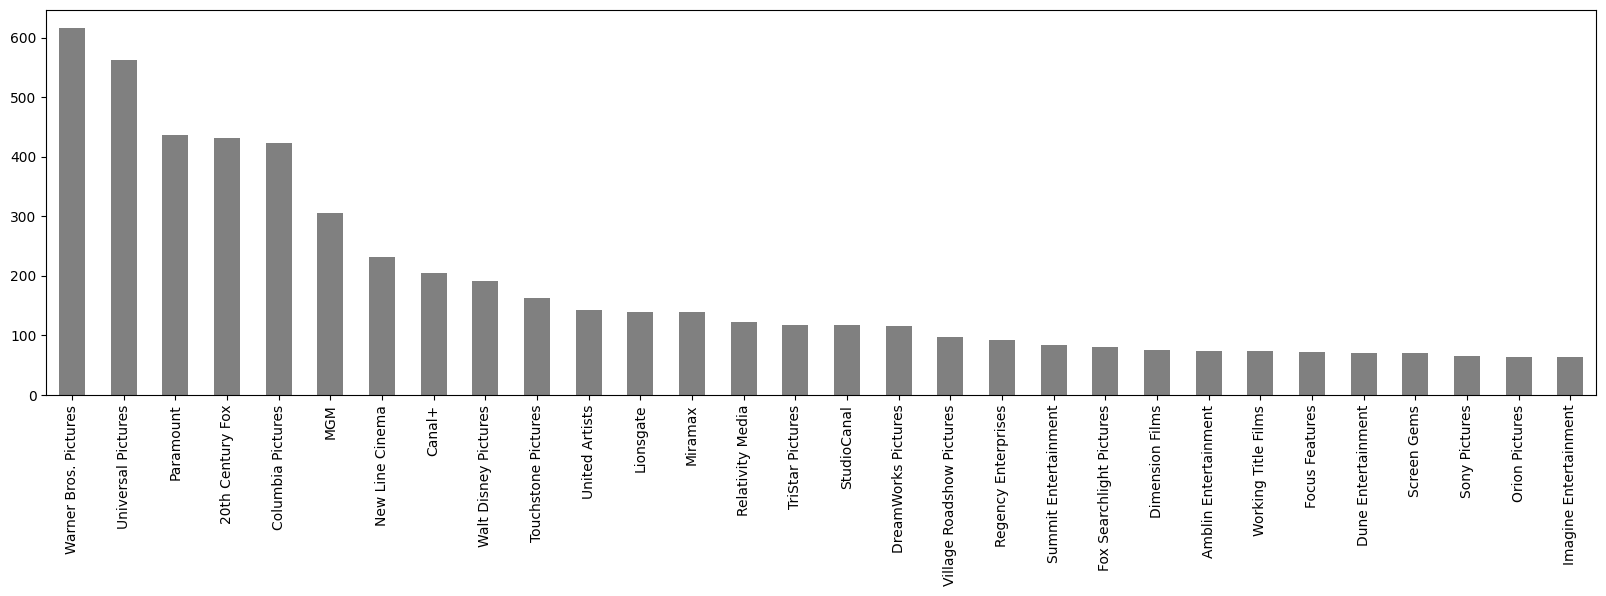

In [35]:
dnew_production.production_companies.value_counts().nlargest(
    30).plot(figsize=(20, 5), kind='bar', color='grey')


In [36]:
dnew_production.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28052 entries, 0 to 9216
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   production_companies  28052 non-null  object  
 1   popularity            28052 non-null  float64 
 2   decade                28032 non-null  category
 3   revenue               28052 non-null  float64 
dtypes: category(1), float64(2), object(1)
memory usage: 904.4+ KB


In [37]:
production_total_revenue = dnew_production.pivot_table(
    "revenue", index=['production_companies'], aggfunc='sum')
top10_companies = production_total_revenue.sort_values(by='revenue', ascending=False)[:10]

Warner Bros. Pictures ranks first among the top 10 companies with the highest revenues from 1920-2022.

#### Review of top 10 revenue generating companies

In [38]:

make_total_1 = dnew_production.groupby(['production_companies']).agg(
    revenue=('revenue', 'sum'),
    popularity=('popularity', 'sum'),
).reset_index()

top10_companies_1=make_total_1.sort_values(
    by='revenue', ascending=False)[:10]

top10_companies_1.head(10)


,production_companies,revenue,popularity
9107,Warner Bros. Pictures,7.754749e+10,23635.078
8812,Universal Pictures,7.264750e+10,23958.909
54,20th Century Fox,5.532452e+10,12990.294
1895,Columbia Pictures,5.341457e+10,16560.127
6270,Paramount,5.245350e+10,16023.548
9080,Walt Disney Pictures,5.193698e+10,15101.693
5255,Marvel Studios,2.875416e+10,7344.056
5824,New Line Cinema,2.694482e+10,15401.554
2421,DreamWorks Pictures,1.954253e+10,3792.375
5048,MGM,1.925838e+10,6811.205


[Help-> Pandas groupby() and sum() With Examples][Link]

[Link]: https://sparkbyexamples.com/pandas/pandas-groupby-sum-examples/

[Help-> sum of multiple columns][Link]

[Link]: https://stackoverflow.com/questions/46431243/pandas-dataframe-groupby-how-to-get-sum-of-multiple-columns

In [39]:
fig = px.bar(top10_companies_1, x="popularity", y="production_companies",
             color="revenue", barmode='group', text_auto='.2s',)
fig.show()


In [40]:
make_total_2= dnew_production.groupby(['production_companies', 'decade']).agg(
    revenue=('revenue', 'sum'),
    popularity=('popularity', 'sum'),
).reset_index()

top10_companies_2 = make_total_2.sort_values(
    by='revenue', ascending=False)[:10]

top10_companies_2.head(10)

,production_companies,decade,revenue,popularity
96941,Universal Pictures,2010s,2.992033e+10,6752.072
100186,Warner Bros. Pictures,2010s,2.878148e+10,5787.929
100185,Warner Bros. Pictures,2000s,2.563645e+10,7402.036
99889,Walt Disney Pictures,2010s,2.547913e+10,5700.050
20854,Columbia Pictures,2010s,2.170116e+10,4959.702
57814,Marvel Studios,2010s,2.111390e+10,2739.252
603,20th Century Fox,2010s,1.941215e+10,5051.947
602,20th Century Fox,2000s,1.861056e+10,3778.824
99888,Walt Disney Pictures,2000s,1.771724e+10,3621.435
20853,Columbia Pictures,2000s,1.770338e+10,3914.904


### Movie Genres

In [41]:
dnew_genres = dnew[['genres', 'revenue', 'popularity']]
dnew_genres.head()


,genres,revenue,popularity
0,Horror-Thriller,5325078.0,6912.168
1,Action-Fantasy-Science Fiction,140000000.0,4657.005
2,Horror-Thriller-Mystery,2892594.0,2627.102
3,Horror-Thriller,63000000.0,2166.823
4,Family-Animation-Fantasy-Music-Comedy-Adventure,800526015.0,2000.190


In [42]:
from itertools import chain

def chainer(s):
    return list(chain.from_iterable(s.str.split('-')))

row_new = dnew_genres['genres'].str.split('-').map(len)

dnew_genres = pd.DataFrame({
    'genres': chainer(dnew_genres['genres']),
    'revenue': np.repeat(dnew_genres['revenue'], row_new),
    'popularity': np.repeat(dnew_genres['popularity'], row_new)})

dnew_genres.head()


,genres,revenue,popularity
0,Horror,5325078.0,6912.168
0,Thriller,5325078.0,6912.168
1,Action,140000000.0,4657.005
1,Fantasy,140000000.0,4657.005
1,Science Fiction,140000000.0,4657.005


<AxesSubplot:>

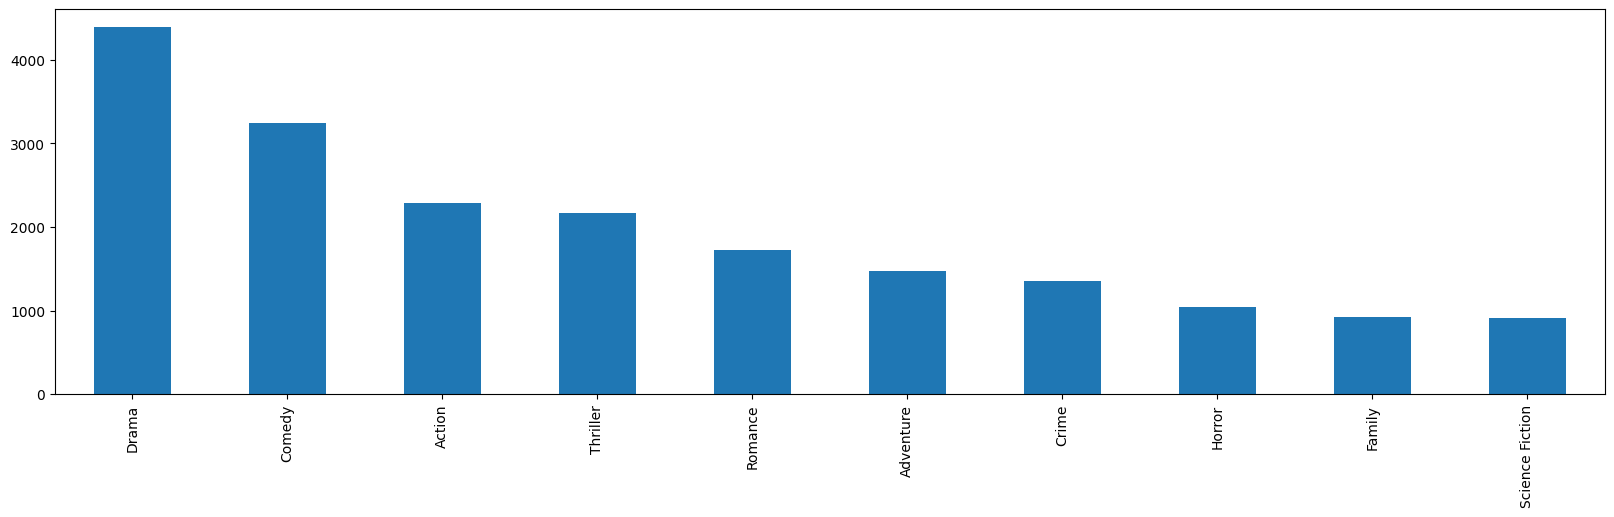

In [43]:
dnew_genres.genres.value_counts().nlargest(
    10).plot(figsize=(20, 5), kind='bar')


The number of films seems to be mostly in the drama genre.

In [44]:
fig = px.pie(dnew_genres, values='revenue', names='genres',
             title='',
             hover_data=['popularity'], labels={'popularity': 'popularity'})

fig.show()

In [45]:
make_genres = dnew_genres.groupby(['genres']).agg(
    revenue=('revenue', 'sum'),
    popularity=('popularity', 'sum'),
).reset_index()

top10_genres = make_genres.sort_values(
    by='revenue', ascending=False)[:10]

top10_genres.head(10)


,genres,revenue,popularity
0,Action,2.710452e+11,87756.274
1,Adventure,2.682594e+11,65054.896
3,Comedy,2.133342e+11,75410.395
6,Drama,1.957152e+11,77680.555
16,Thriller,1.448966e+11,74675.937
8,Fantasy,1.338890e+11,49254.370
14,Science Fiction,1.323216e+11,40298.092
7,Family,1.249789e+11,40230.908
13,Romance,8.684426e+10,28520.606
2,Animation,8.673394e+10,31543.824


# Conclusion

❓ Examining the reason for the high income of movies by comparing them with other features.

Some of the conclusions drawn from the analysis are:

- The income changes of the films between the years 1920-2022 were analyzed by creating column and line graphs.
- The years with the highest revenue for movies are 2020s.  
<p> </p>

- An attempt was made to find the pairwise correlation of the columns. Correlation calculation and scatter plots were created to analyze correlations between different variables.
- [Correlation Coefficients][Link] whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated. Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated. Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation. Correlation coefficients whose magnitude are less than 0.3 have little if any (linear) correlation. **This is why budget is moderately , popularity and vote_average are low correlated.**
<p> </p>

- The top 10 production companies with the highest total income were examined. Warner Bros Pictures is in first place and Universal Pictures is in second place.
- A graph showing the popularity and revenue of these 10 production companies has been created.
<p> </p>

- Film genres were examined. Although the number of drama films is high, the genre with the highest revenue is Action. In the list, after the action movie genre, adventure and comedy genres come respectively.


[Link]: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm